# Introdução a Redes neurais com MLP

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## 1. Aquisição de dados

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

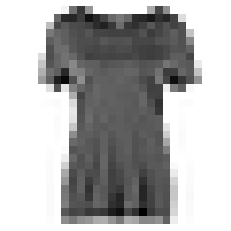

In [5]:
#testar diferentes exemplos
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

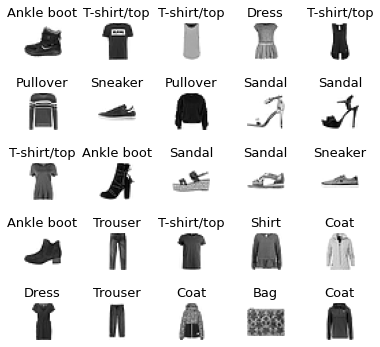

In [8]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=13)
plt.subplots_adjust(wspace=1.0, hspace=0.5)
plt.show()

## 2. Pré-processamento

In [9]:
# Criar um conj de validação de 5k e mudar a escala dos pixels de 0-255 para 0-1 (float)
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:] 
X_test = X_test / 255.

## 3. Construindo a arquitetura

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
hidden1 = model.layers[1]

In [14]:
weights, biases = hidden1.get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

In [17]:
hidden2 = model.layers[2]

In [18]:
weights, biases = hidden2.get_weights()

In [19]:
weights.shape

(300, 100)

In [20]:
biases.shape

(100,)

In [21]:
output = model.layers[3]

In [22]:
weights, biases = output.get_weights()

In [23]:
weights.shape

(100, 10)

In [24]:
biases.shape

(10,)

## 4. Treinando a rede

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### 4.1. Parâmetros do treino

- loss="sparse_categorical_crossentropy"

Pr(Class A) | **Pr(Class B)** | Pr(Class C)

y_true = [1] -> 0.0       |   1.0        |  0.0  

Pr(Class A) | Pr(Class B) |  Pr(Class C)     

0.228     |     0.619        |   0.153

![Entropia Cruzada](https://miro.medium.com/max/840/1*loucyTXzGHuHi6D4PxjDlA.png)

Resp: 0.479 -> valor do erro da entropia cruzada

- optimizer="sgd" (Stochastic Gradient Descent)

![Gradiente Descendente](https://miro.medium.com/max/1398/1*IxMLWG1xsZ50b91M5VJXSA.jpeg) 
![title](gradient.png) 
![Taxa de Aprendizado](https://miro.medium.com/max/1050/1*vuMse7jQQXTcWZdQ9gRGCw.png) 
![Variações do Gradiente](https://miro.medium.com/max/1050/1*TD5xBpl6YP1McZoKBfVyDA.png) 

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7089 - accuracy: 0.7671 - val_loss: 0.5175 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8298 - val_loss: 0.4403 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4396 - accuracy: 0.8456 - val_loss: 0.4083 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4127 - accuracy: 0.8555 - val_loss: 0.4341 - val_accuracy: 0.8460
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3916 - accuracy: 0.8629 - val_loss: 0.3964 - val_accuracy: 0.8580
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8671 - val_loss: 0.3941 - val_accuracy: 0.8552
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3625 - accuracy: 0.8725 - val_loss: 0.3675 - val_accuracy:

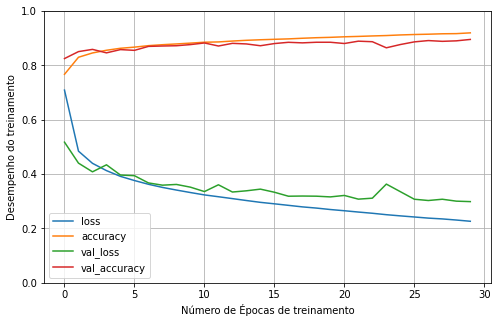

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 5. Testando o modelo

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8934


[0.4506179094314575, 0.8934000134468079]

In [44]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 19ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [46]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [34]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.8898
Kappa:  0.8775555555555555
Matriz de confusão: 
 [[833   2  15   8   7   2 125   0   8   0]
 [  6 972   0  11   7   0   4   0   0   0]
 [ 19   1 796   6 104   1  72   0   1   0]
 [ 38   9  19 845  51   0  32   0   6   0]
 [  0   1  51  18 862   0  66   0   2   0]
 [  1   0   0   1   0 961   0  18   1  18]
 [ 91   0  62  18  69   0 749   0  11   0]
 [  0   0   0   0   0  15   0 963   0  22]
 [  9   0   6   0   7   3  11   3 961   0]
 [  0   0   0   0   0   8   1  35   0 956]]


In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## 6. Salvando o modelo

In [37]:
model.save("modelo_mlp.h5")

In [38]:
model = keras.models.load_model("modelo_mlp.h5")

In [39]:
np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [40]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [41]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9784 - val_loss: 0.4170 - val_accuracy: 0.8946
Epoch 2/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9789 - val_loss: 0.3878 - val_accuracy: 0.9012
Epoch 3/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0619 - accuracy: 0.9791 - val_loss: 0.4080 - val_accuracy: 0.8910
Epoch 4/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9798 - val_loss: 0.3922 - val_accuracy: 0.8984
Epoch 5/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9804 - val_loss: 0.3903 - val_accuracy: 0.8968
Epoch 6/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9808 - val_loss: 0.4154 - val_accuracy: 0.8934
Epoch 7/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9805 - val_loss: 0.3885 - val_accuracy:

$Atividade (1.25):$ Treine uma MLP no conjunto de dados MNIST e veja se você consegue obter mais de 98% de precisão. Dica: faça a aquisição dos dados usando o Keras (keras.datasets.mnist.load_data()).